# Dataoverføring og statistikk

## Lese inn en fil

`pylab.loadtxt(<filename>[, delimiter=hva man skiller dataene med (',')][, skiprows=antalllinjer å hoppe over][, dtype=datatype])`

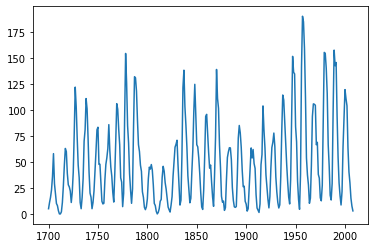

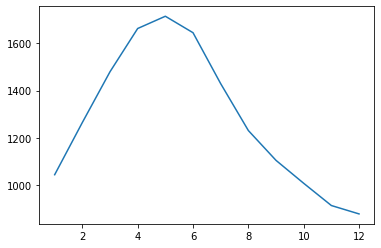

In [62]:
import pylab

data = pylab.loadtxt("sunspots.csv", delimiter=",", skiprows=1)

nr = data[:, 0]
verdi = data[:, 1]

pylab.plot(nr, verdi)
pylab.show()

maaned = pylab.linspace(1, 12, 12)
solflekker = [0] * 12

for i in range(0, len(nr)):
    month = i % 12
    
    solflekker[month] += verdi[i]

pylab.plot(maaned, solflekker)
pylab.show()

## Statistisk analyse

### Gjennomsnitt
summen av alle verdiene delt på antall verdier.

$$\bar x = \frac{1}{n}\sum_{i=1}^{n}x_i$$

`pylab.mean(<liste med verdier>)`


### Standardavvik

største/minste verdi - gjennomsnittet

$$s = \sigma^2 = \sqrt{\frac{1}{n} \sum_{i=1}^{n}(x_i - \bar x)^2}$$

`pylab.std(<liste med verdier>)`

In [64]:
import pylab

alder = [15, 24, 16, 18, 19, 42, 15, 20, 16, 17, 19]

snitt = pylab.mean(alder)
print("Gjennomsnittsalder: {}".format(snitt))

avvik = pylab.std(alder)
print("StandardAvvik: {}".format(avvik))

Gjennomsnittsalder: 20.09090909090909
StandardAvvik: 7.366441665411962


## Regresjon

Finne en modell for et datasett.  Detet gjøres ved å finne en funksjon (ofte en polynomfunksjon) som passer best mulig med punktene.  Dette blir en modell, som kan stemme bra.  Likevel kan den forutsi veldig rare verdier langt utenfor datasettet.

[ 2.60416667e-08 -5.20833333e-06  6.14583333e-04 -4.16666667e-04
  3.57000000e+01]


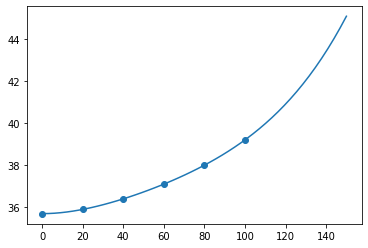

In [68]:
import pylab

T = [0, 20,  40, 60, 80, 100]
sol_NaCl = [35.7, 35.9, 36.4, 37.1, 38.0, 39.2]

pylab.scatter(T, sol_NaCl)

grad = 4

reg_NaCl = pylab.polyfit(T, sol_NaCl, grad)
print(reg_NaCl)

def polynomFunction(polynom, x):
    ret = 0
    for i in range(0, len(polynom)):
        g = len(polynom) - 1 - i
        ret += polynom[i] * x ** g
    return ret
        

x = pylab.linspace(0, 150)
y1 = polynomFunction(reg_NaCl, x)
pylab.plot(x, y1)

pylab.show()

### R2-test

R2 score gir en verdi på hvor godt regresjonen stememr med dataene.  Går fra 0 til 1, der 0 er ufattelig dårlig, og 1 er akkurat riktig.
Denne kan brukes for å finen ut om regresjonen er god, MEN den kan vise at den er veldig god fordi den passer veldig godt med dataene, men passer ikke i det heledatt mellom datapunktene.

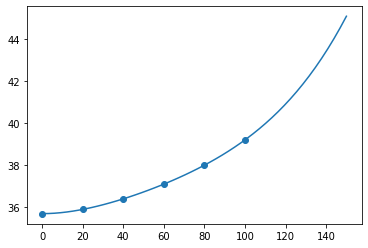

R2 test: 1.0


In [30]:
import pylab
from sklearn.metrics import r2_score

T = [0, 20,  40, 60, 80, 100]
sol_NaCl = [35.7, 35.9, 36.4, 37.1, 38.0, 39.2]

pylab.scatter(T, sol_NaCl)

grad = 4

reg_NaCl = pylab.polyfit(T, sol_NaCl, grad)

def polynomFunction(polynom, x):
    ret = 0
    for i in range(0, len(polynom)):
        g = len(polynom) - 1 - i
        ret += polynom[i] * x ** g
    return ret
        

x = pylab.linspace(0, 150)
y = polynomFunction(reg_NaCl, x)

pylab.plot(x, y)
pylab.show()

# R2 test
R2y = polynomFunction(reg_NaCl, pylab.array(T))
R2 = r2_score(sol_NaCl, R2y)
print("R2 test: {}".format(R2))


### Ekstrapolering

Forutsi senere verdier.  Selvom R2 verdien er veldig god, trenger den ikke være god på senere verdier.


## Diagrammer

`errorbar` kan brukes for å lage et usikekrhetsplott.  Det gir feilmargin barer på hvert punkt

### kakediagram og søylediagram

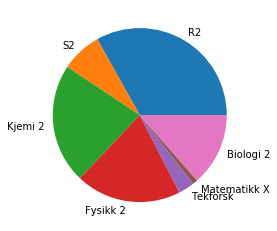

In [4]:
import pylab

fag = ["R2", "S2", "Kjemi 2", "Fysikk 2", "Tekforsk", "Matematikk X", "Biologi 2"]

antall = [110, 25, 74, 65, 10, 3, 45]

pylab.pie(antall, labels=fag)
pylab.show()

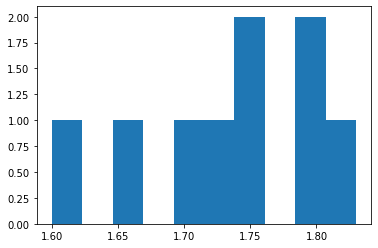

In [10]:
import pylab

hoyder = [1.79, 1.80, 1.60, 1.75, 1.65, 1.76, 1.83, 1.71, 1.72]

pylab.hist(hoyder)
pylab.show()

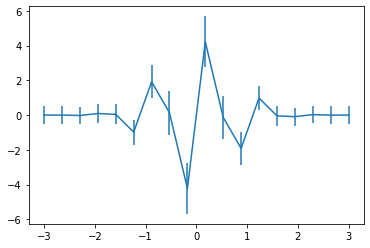

In [2]:
from pylab import *

x = linspace(-3, 3, 18)
y = 5 * exp(-x**2) * sin(6 * x)

errorbar(x, y, yerr = exp(-x**2) + .5)
show()